# Twitter Data Sentiment Analysis

In this file we are performing sentiment analysis on the ElonMusk tweet data and performing visualisation on his tweets

In [1]:
# Initial imports

import requests
import os
import json
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

# tweepy for twitter data requests
import tweepy as tw

from monkeylearn import MonkeyLearn
 

### Loading environment variables

In [2]:
# Loading environment variables
load_dotenv()

# Loading the twitter tokens and keys for twitter OAuth access
consumer_key = os.getenv("consumer_key")
consumer_secret = os.getenv("consumer_secret")
access_token = os.getenv("access_token")
access_token_secret = os.getenv("access_token_secret")
bearer_token = os.getenv("BEARER")

# Loading the monkeylearn api key for sentiment analysis
monkeylearn_key = os.getenv("monkey_learn")

### Twitter api client setup for elonmusk tweet

In [3]:
# Twitter api client setup for elonmusk tweet
query = 'from:elonmusk -is:retweet'
client = tw.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)
     

In [4]:
    
# start time of the data parameter
start_time = '2021-01-01T00:00:00Z'

# end_time of the data parameter
end_time = '2022-05-06T00:00:00Z'

userid="44196397"

# get maximun 100 tweets for last 7 days only
tweets = client.search_recent_tweets(query=query, 
                                     tweet_fields=['text','author_id', 'created_at'],
                                     max_results=100)


tweets_dict = tweets.json()
tweets_data = tweets_dict['data'] 
df = pd.json_normalize(tweets_data) 

df.tail(10)

,created_at,id,text,author_id
90,2022-05-12T00:25:30.000Z,1524546271964504066,Tap on the stars in upper right of screen to r...,44196397
91,2022-05-12T00:24:46.000Z,1524546085590646786,Chronological tweets seem much better than wha...,44196397
92,2022-05-11T19:34:04.000Z,1524472930469650434,@stevenmarkryan Literally true. Even 100x is p...,44196397
93,2022-05-11T19:32:21.000Z,1524472498074628097,@WholeMarsBlog Without billions of miles of tr...,44196397
94,2022-05-11T19:24:56.000Z,1524470633349922822,https://t.co/CWWDdur0oz,44196397
95,2022-05-11T19:01:50.000Z,1524464817049935873,@henrylmcnamara 🤣,44196397
96,2022-05-11T02:39:49.000Z,1524217684803690496,@WholeMarsBlog @akidesir Release notes on this...,44196397
97,2022-05-11T02:18:05.000Z,1524212214206550017,@akidesir Probably this weekend. Lot of code u...,44196397
98,2022-05-11T01:00:15.000Z,1524192627364708355,@BillyM2k Exactly,44196397
99,2022-05-11T00:56:54.000Z,1524191785760788480,Starlink has resisted Russian cyberwar jamming...,44196397


#### There is a limitation that search_all_tweets in API v2 is not available for the elevated access level. 
#### It is available only the 'Academic Research' level access has the access to all time data. 
#### Ignore below failure as we have sourced the dataset from https://www.kaggle.com/datasets/ayhmrba/elon-musk-tweets-2010-2021?select=2021.csv

In [5]:
# due to the limitation on search_recent_tweets trying different api call to fetch full data

tweets = client.search_all_tweets(query=query, tweet_fields=['text','author_id', 'created_at'],
                                  start_time=start_time,
                                  end_time=end_time, 
                                  max_results=100)

# There is a limitation that search_all_tweets in API v2 is not available for the elevated access level. 
# only the 'Academic Research' level access has the access to all time data. 

Forbidden: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.

 * Due to the twitter limiation on historical data use the kaggle to fetch the publicly available dataset
 * https://www.kaggle.com/datasets/ayhmrba/elon-musk-tweets-2010-2021?select=2021.csv


In [6]:
# Loading the tweet data from csv file to dataframe

tweet_path = "Resources/2021_ElonMusk_Tweets.csv"
tweet_df = pd.read_csv( tweet_path, index_col="id", infer_datetime_format=True, parse_dates=True)
tweet_df.sort_index()
tweet_df.head()

,date,name,tweet,replies_count,retweets_count,likes_count
id,,,,,,
1.476662e+18,2021-12-31,Elon Musk,@roshanpateI 🤣 $7,793,364,13468
1.476656e+18,2021-12-31,Elon Musk,@tesla_raj Many UI improvements coming,1008,435,12209
1.476652e+18,2021-12-31,Elon Musk,@CSmithson80 @heydave7 @BLKMDL3 @mims This cha...,240,143,2529
1.476620e+18,2021-12-30,Elon Musk,@BLKMDL3 @mims Predicting macroeconomics is ch...,709,1235,5756
1.476618e+18,2021-12-30,Elon Musk,"@mims If history is any guide, not many will m...",370,549,5247


In [7]:
# cleanup the data 
tweet_df.isnull().sum()

date              0
name              0
tweet             0
replies_count     0
retweets_count    0
likes_count       0
dtype: int64

In [8]:
# Drop nulls
tweet_df = tweet_df.dropna().copy()
print("\033[1mCLEANED NULLS:\n\033[0m")
print( tweet_df.isnull().sum())
print("\n\033[1mCLEANED TWITTER DATA:\033[0m\n")
tweet_df.head()

CLEANED NULLS:

date              0
name              0
tweet             0
replies_count     0
retweets_count    0
likes_count       0
dtype: int64

CLEANED TWITTER DATA:



,date,name,tweet,replies_count,retweets_count,likes_count
id,,,,,,
1.476662e+18,2021-12-31,Elon Musk,@roshanpateI 🤣 $7,793,364,13468
1.476656e+18,2021-12-31,Elon Musk,@tesla_raj Many UI improvements coming,1008,435,12209
1.476652e+18,2021-12-31,Elon Musk,@CSmithson80 @heydave7 @BLKMDL3 @mims This cha...,240,143,2529
1.476620e+18,2021-12-30,Elon Musk,@BLKMDL3 @mims Predicting macroeconomics is ch...,709,1235,5756
1.476618e+18,2021-12-30,Elon Musk,"@mims If history is any guide, not many will m...",370,549,5247


In [9]:
# Filter out the tweets that is not bitcoin or crypto related

df = tweet_df.loc[tweet_df['tweet'].str.contains("bitcoin|crypto", case=False)]

df.to_csv("Resources/Filtered_Tweets.csv")
df.shape

(54, 6)

##### MonkeyLearn API call to get sentiment analaysis on the tweets against our model 
##### Model : cl_BT7fBUhn

##### Ignore the below code if throws error as we have reached the limit on the monkeylearn. Since we have already sourced the sentiment analysis into a Processed_Tweet.csv file to use it further

In [10]:
# process the tweet via Monkeylearn modelcl_BT7fBUhn 
ml = MonkeyLearn(monkeylearn_key)

#our sentiment analysis model
model_id = 'cl_BT7fBUhn'

tweet_classification  = []
confidence = []

# calling the api with passing tweet column data
result = ml.classifiers.classify(model_id, df['tweet'].tolist())

#Looping thru the api responce to get the classification data.

classifications = result.body

for i in classifications:
    tweet_classification.append( i['classifications'][0])
    confidence.append(i['classifications'][1])

#Merging the classification tag to dataframe.
df['classification']= tweet_classification
df['confidence']=confidence

df.head()

#saving the sentiment data to csv file to be used in plotting or to be used in other notebooks
df.to_csv("Resources/Processed_Tweets.csv")

PlanQueryLimitError: Error PLAN_QUERY_LIMIT: Request Throttled. You do not have enough queries left to perform this action. 54 queries are required, but you have 1 queries remaining.

In [11]:
# since the api call has reached the limit we are using processed sentiment data set 
tweet_path = "Resources/Processed_Tweet.csv"
proc_tweet_df = pd.read_csv( tweet_path, index_col="id", infer_datetime_format=True, parse_dates=True)
proc_tweet_df.head()

,date,name,tweet,replies_count,retweets_count,likes_count,Classification,Confidence
id,,,,,,,,
1,4/2/2021,Elon Musk,Dogecoin is the peopleâs crypto,18465,97994,533684,Positive,0.474
2,7/2/2021,Elon Musk,@itsALLrisky Itâs the most fun crypto!,807,3537,22013,Positive,0.418
3,9/2/2021,Elon Musk,@CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer ...,240,158,3167,Positive,0.594
4,10/2/2021,Elon Musk,@freewalletorg Any crypto wallet that wonât ...,2012,4449,28205,Positive,0.508
5,19/2/2021,Elon Musk,"@realfuckingnews @business Somehow, a hash tex...",894,992,8356,Positive,0.431


In [12]:
# Drop duplicates based on date and sentiment and keep negative sentitment tweet only

proc_tweet_df = proc_tweet_df.sort_values('Classification').drop_duplicates(subset=['date','Classification'], keep='last')

proc_tweet_df['date'] = pd.to_datetime(proc_tweet_df['date'],infer_datetime_format=True)
proc_tweet_df['period'] = proc_tweet_df['date'].dt.month_name(locale = 'English')
proc_tweet_df = proc_tweet_df.set_index('date')

# Add more columns to dataframe for each sentiment
negative_df = proc_tweet_df.loc[proc_tweet_df['Classification']=='Negative']
negative_df['sentiment_numeric'] = -1
negative_df['negative'] = 1

positive_df = proc_tweet_df.loc[proc_tweet_df['Classification']=='Positive']
positive_df['sentiment_numeric'] = 1
positive_df['positive'] = 1

neutral_df = proc_tweet_df.loc[proc_tweet_df['Classification']=='Neutral']
neutral_df['sentiment_numeric'] = 0
neutral_df['neutral'] = 1

proc_tweet_df = pd.concat([negative_df, positive_df, neutral_df]).sort_values('date')

#fill 0 ot NaN values
proc_tweet_df = proc_tweet_df.fillna(0).sort_values('date')

#store the tweets into csv file for dashboard ploting
proc_tweet_df.to_csv("Resources/Sentiment_Tweets.csv")
proc_tweet_df.head()

C:\Users\padma\AppData\Local\Temp\ipykernel_13340\3642363220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['sentiment_numeric'] = -1
C:\Users\padma\AppData\Local\Temp\ipykernel_13340\3642363220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['negative'] = 1
C:\Users\padma\AppData\Local\Temp\ipykernel_13340\3642363220.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,name,tweet,replies_count,retweets_count,likes_count,Classification,Confidence,period,sentiment_numeric,negative,positive,neutral
date,,,,,,,,,,,,
2021-02-04,Elon Musk,Dogecoin is the peopleâs crypto,18465,97994,533684,Positive,0.474,February,1,0.0,1.0,0.0
2021-02-07,Elon Musk,@itsALLrisky Itâs the most fun crypto!,807,3537,22013,Positive,0.418,February,1,0.0,1.0,0.0
2021-02-09,Elon Musk,@CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer ...,240,158,3167,Positive,0.594,February,1,0.0,1.0,0.0
2021-02-10,Elon Musk,@freewalletorg Any crypto wallet that wonât ...,2012,4449,28205,Positive,0.508,February,1,0.0,1.0,0.0
2021-02-19,Elon Musk,@business Teslaâs action is not directly ref...,922,3228,26473,Positive,0.623,February,1,0.0,1.0,0.0


#### Plot pie chart by sentiment classification 

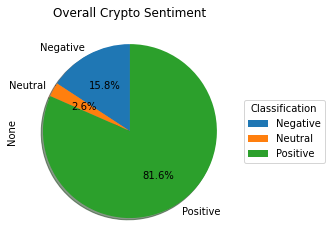

In [13]:
pie_plot = proc_tweet_df.groupby('Classification').size().plot.pie( autopct='%1.1f%%',
        shadow=True, startangle=90)

pie_plot.legend(
          title="Classification",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

pie_plot.set_title("Overall Crypto Sentiment")

plt.show()

#### Helper methods for plotting 

In [14]:
def create_line_chart(data, title, xlabel, ylabel, size):
    """
    Create a line chart based in the data argument.
    """
    fig = plt.figure(constrained_layout=True, figsize=(6,5))
    linechart = data.plot.line(figsize = size, title=title, legend=True )
    linechart.set_xlabel(xlabel)
    linechart.set_ylabel(ylabel)
    plt.show()
    plt.close(fig)

# Resuable function for creating bar chart
def create_bar_chart(data, title, xlabel, ylabel,  size):
    """
    Create a barplot based in the data argument.
    """
  
    fig = plt.figure(constrained_layout=True, figsize=(6,6))
    barchart = data.plot.bar(figsize=size, title=title, x=xlabel )
    barchart.set_xlabel(xlabel)
    barchart.set_ylabel(ylabel)
    plt.show()
    plt.close(fig)

#### Visualize the tweet activity by date

<Figure size 432x432 with 0 Axes>

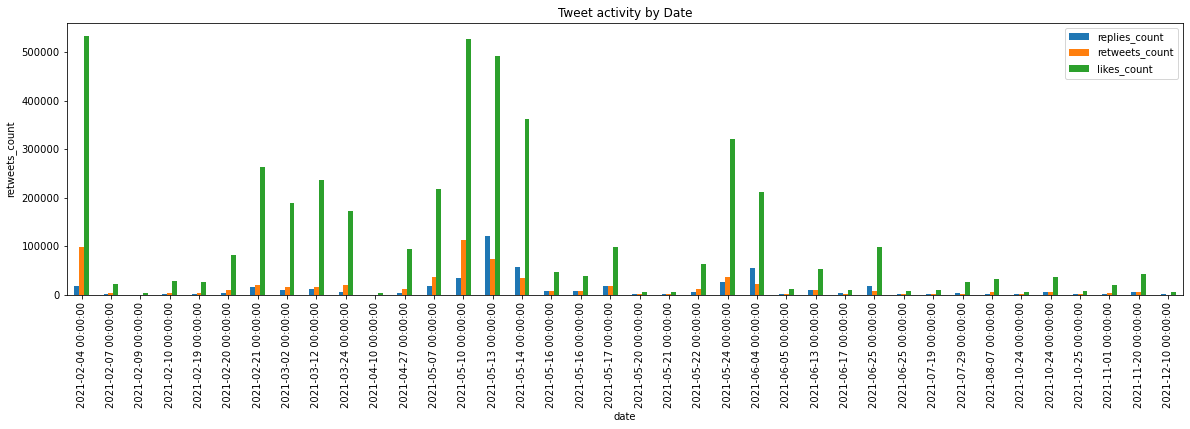

In [15]:
#reseting index to use date column
proc_tweet_df = proc_tweet_df.reset_index()

create_bar_chart(proc_tweet_df[["date","replies_count","retweets_count","likes_count"]], "Tweet activity by Date", 'date', 'retweets_count',  (20,5))

#### Visualize the tweet activity by sentiment

<Figure size 432x432 with 0 Axes>

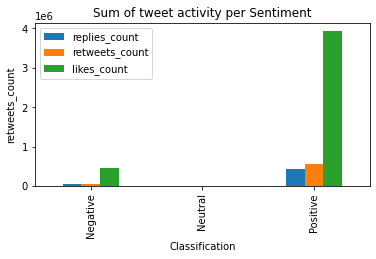

In [16]:
# groupby the tweet columns by classification
groupby_classification = proc_tweet_df[["replies_count","retweets_count","likes_count"]].groupby(proc_tweet_df.Classification).sum().reset_index()

create_bar_chart(groupby_classification, "Sum of tweet activity per Sentiment", 'Classification', 'retweets_count',  (6,3))

#### Visualize the sentiment by month

<Figure size 432x360 with 0 Axes>

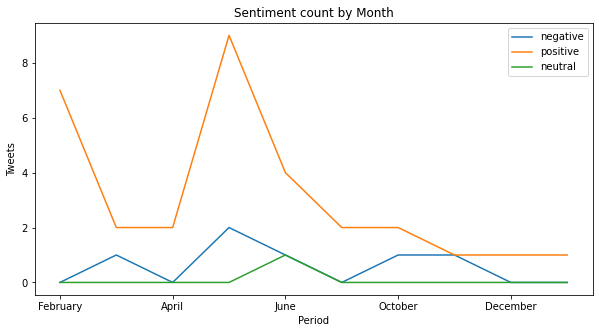

In [17]:
# aggregate the sentiments by period:month
groupby_period = proc_tweet_df[["negative","positive","neutral"]].groupby(proc_tweet_df.period).sum().reset_index()

# Sort by month index
sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','September', 'October', 'November','December']

groupby_period.index = pd.CategoricalIndex(groupby_period['period'], categories=sort_order, ordered =True)
groupby_period =groupby_period .sort_index()

#Visualize the sentiment by month
create_line_chart(groupby_period, "Sentiment count by Month", 'Period', 'Tweets',  (10,5))